In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## aggregate film format statistics

In [145]:
format_df = pd.read_csv('../data/screenplay-formats.csv')
format_df.groupby('format').count()

,file
format,
0,17
2,44
3,3
4,3
5,12
6,1


## identifying main characters (MCs)

In [3]:
protag_df = pd.read_csv('../data/protags.csv')
mc_df = pd.read_csv('../data/main_chars.csv')

#### distribution of MCs

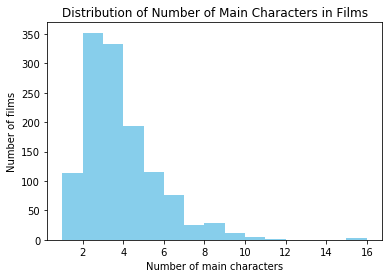

In [12]:
mc_distr_df = mc_df.groupby('film').count().reset_index()[['film','main_char']]
plt.xlabel('Number of main characters')
plt.ylabel('Number of films')
plt.title('Distribution of Number of Main Characters in Films')
mc_distr_df['main_char'].hist(bins=15, color='skyblue', figsize=(6,4), grid=False)
plt.savefig('../plots/mc_distr.png')

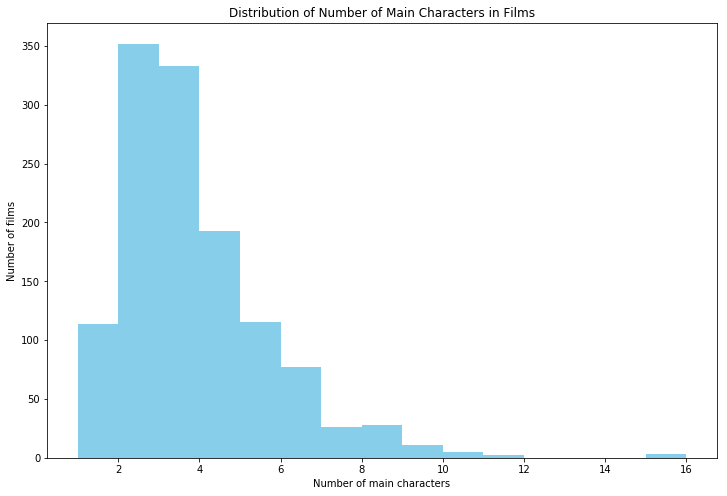

In [11]:
# presentation
mc_distr_df = mc_df.groupby('film').count().reset_index()[['film','main_char']]
plt.xlabel('Number of main characters')
plt.ylabel('Number of films')
plt.title('Distribution of Number of Main Characters in Films')
mc_distr_df['main_char'].hist(bins=15, color='skyblue', figsize=(12,8), grid=False)

In [5]:
mc_distr_df['main_char'].mean()

3.374900714853058

In [6]:
mc_distr_df['main_char'].median()

3.0

In [7]:
mc_distr_df['main_char'].mode()

0    2
dtype: int64

In [8]:
mc_distr_df['main_char'].min()

1

In [9]:
mc_distr_df['main_char'].max()

16

In [10]:
mc_distr_df['main_char'].quantile([0.25,0.75])

0.25    2.0
0.75    4.0
Name: main_char, dtype: float64

### protagonists by gender

In [14]:
protag_gender_df = pd.merge(protag_df, mc_df, left_on=['film','protag'], right_on=['film','main_char'])[['film','protag','gender']]
protag_gender_df.head(2)

,film,protag,gender
0,The Doom Generation,AMY,1.0
1,The Elephant Man (film),TREVES,0.0


In [15]:
protag_gender_df.groupby('gender').count()

,film,protag
gender,,
0.0,807,807
1.0,429,429


In [16]:
protag_gender_df[np.isnan(protag_gender_df['gender'])].shape[0]

23

### distribution by gender

In [17]:
mc_df.groupby('gender').count()[['film']]

,film
gender,
0.0,2360
1.0,1724


In [18]:
mc_df[np.isnan(mc_df['gender'])].shape[0]

165

In [19]:
num_fem_df = mc_df.groupby('film').sum().reset_index()[['film','gender']]
num_mc_df = mc_df.groupby('film').count().reset_index()[['film','main_char']]

mc_gender_df = pd.merge(num_fem_df, num_mc_df)
mc_gender_df.columns = ['film','num_fem','num_mc']
mc_gender_df['num_male'] = mc_gender_df['num_mc'] - mc_gender_df['num_fem']
mc_gender_df['fem_ratio'] = mc_gender_df['num_fem'] / mc_gender_df['num_mc']
mc_gender_df.shape

(1259, 5)

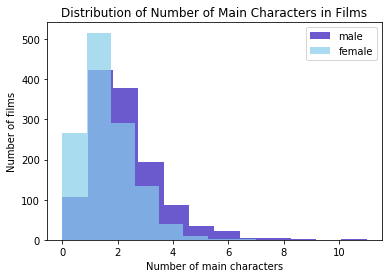

In [154]:
mc_gender_df['num_male'].hist(bins=12, color='slateblue', figsize=(6,4), grid=False, label='male')
mc_gender_df['num_fem'].hist(bins=8, color='skyblue', alpha=0.7, figsize=(6,4), grid=False, label='female')

plt.legend()
plt.title('Distribution of Number of Main Characters in Films')
plt.xlabel('Number of main characters')
plt.ylabel('Number of films')
plt.savefig('../plots/gender-distr.png')

Text(0,0.5,'Number of films')

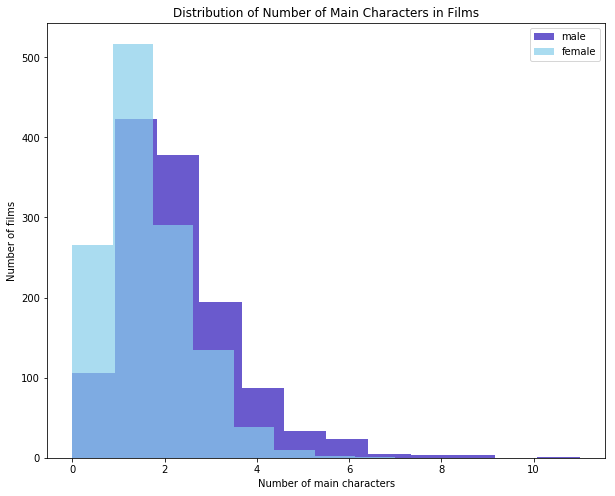

In [20]:
# presentation
mc_gender_df['num_male'].hist(bins=12, color='slateblue', figsize=(10,8), grid=False, label='male')
mc_gender_df['num_fem'].hist(bins=8, color='skyblue', alpha=0.7, figsize=(10,8), grid=False, label='female')

plt.legend()
plt.title('Distribution of Number of Main Characters in Films')
plt.xlabel('Number of main characters')
plt.ylabel('Number of films')

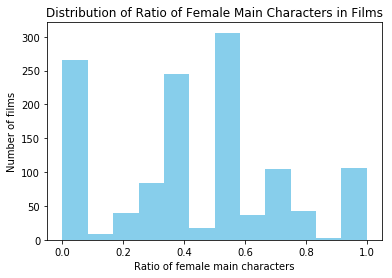

In [155]:
mc_gender_df['fem_ratio'].hist(bins=12, color='skyblue', figsize=(6,4), grid=False)
plt.title('Distribution of Ratio of Female Main Characters in Films')
plt.xlabel('Ratio of female main characters')
plt.ylabel('Number of films')
plt.savefig('../plots/fem-ratio-distr.png')

Text(0,0.5,'Number of films')

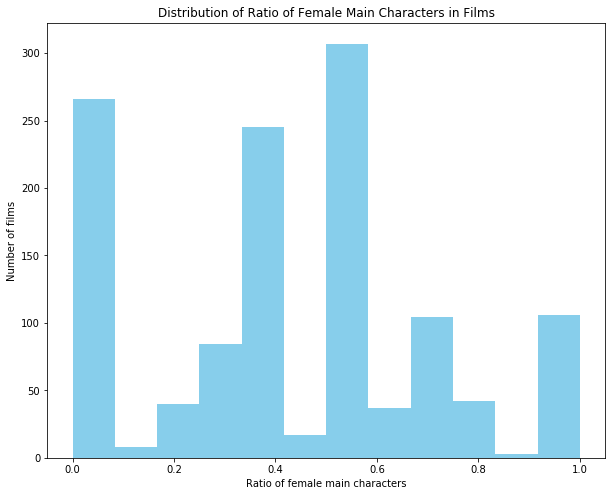

In [21]:
# presentation
mc_gender_df['fem_ratio'].hist(bins=12, color='skyblue', figsize=(10,8), grid=False)
plt.title('Distribution of Ratio of Female Main Characters in Films')
plt.xlabel('Ratio of female main characters')
plt.ylabel('Number of films')

### sentiment analysis

In [22]:
senti_df = mc_df[['film','gender','sentiment_score']]

In [23]:
senti_df.groupby('gender').mean()

,sentiment_score
gender,
0.0,0.009333
1.0,0.015521


In [24]:
senti_df.groupby('gender').median()

,sentiment_score
gender,
0.0,0.007621
1.0,0.013027


In [25]:
def clip(x):
    if (x > 0.15):
        return 0.15
    elif (x < -0.15): 
        return -0.15 
    else:
        return x

senti_df['clipped'] = senti_df['sentiment_score'].apply(clip)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


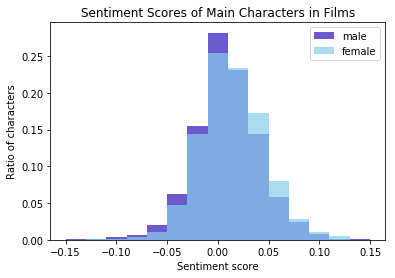

In [26]:
fem_senti = senti_df[senti_df['gender'] == 1.0]['sentiment_score']
male_senti = senti_df[senti_df['gender'] == 0.0]['sentiment_score']

fem_weights = np.ones_like(fem_senti) / float(len(fem_senti))
male_weights = np.ones_like(male_senti) / float(len(male_senti))

male_senti.hist(bins=15, color='slateblue', figsize=(6,4), range=(-0.15, 0.15), weights=male_weights, grid=False, label='male')
fem_senti.hist(bins=15, color='skyblue', alpha=0.7, figsize=(6,4), range=(-0.15, 0.15), weights=fem_weights, grid=False, label='female')
plt.legend()
plt.title('Sentiment Scores of Main Characters in Films')
plt.xlabel('Sentiment score')
plt.ylabel('Ratio of characters')
plt.savefig('../plots/sentiment-distr.png')

Text(0,0.5,'Ratio of characters')

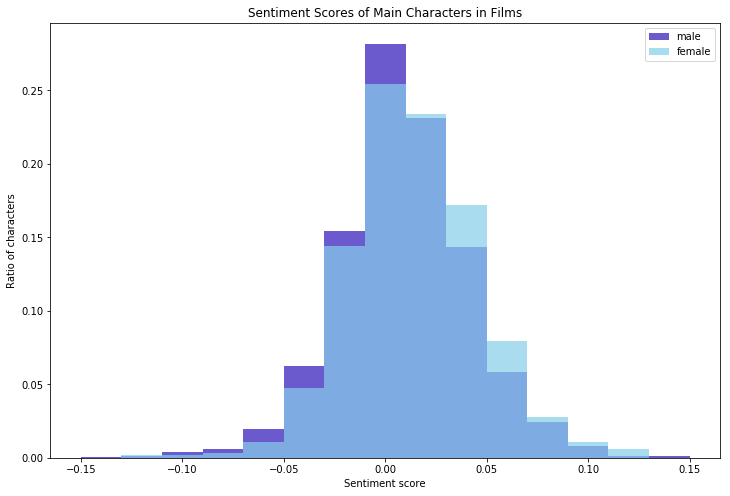

In [29]:
# presentation
fem_senti = senti_df[senti_df['gender'] == 1.0]['sentiment_score']
male_senti = senti_df[senti_df['gender'] == 0.0]['sentiment_score']

fem_weights = np.ones_like(fem_senti) / float(len(fem_senti))
male_weights = np.ones_like(male_senti) / float(len(male_senti))

male_senti.hist(bins=15, color='slateblue', figsize=(8,5), range=(-0.15, 0.15), weights=male_weights, grid=False, label='male')
fem_senti.hist(bins=15, color='skyblue', alpha=0.7, figsize=(12,8), range=(-0.15, 0.15), weights=fem_weights, grid=False, label='female')
plt.legend()
plt.title('Sentiment Scores of Main Characters in Films')
plt.xlabel('Sentiment score')
plt.ylabel('Ratio of characters')